# Store US Stock Prices in HDF5 Format

## Imports

In [17]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

## Load source data

In [28]:
df = pd.read_csv("us_stocks.csv")

In [29]:
df.head()

,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
0,A,1999-11-18,45.50,50.00,40.00,44.00,44739900.0,0.0,1.0,31.041951,34.112034,27.289627,30.018590,44739900.0
1,A,1999-11-19,42.94,43.00,39.81,40.38,10897100.0,0.0,1.0,29.295415,29.336350,27.160002,27.548879,10897100.0
2,A,1999-11-22,41.31,44.00,40.06,44.00,4705200.0,0.0,1.0,28.183363,30.018590,27.330562,30.018590,4705200.0
3,A,1999-11-23,42.50,43.63,40.25,40.25,4274400.0,0.0,1.0,28.995229,29.766161,27.460188,27.460188,4274400.0
4,A,1999-11-24,40.13,41.94,40.00,41.06,3464400.0,0.0,1.0,27.378319,28.613174,27.289627,28.012803,3464400.0


## Apply required transformations

In [30]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index(['ticker','date'])

'''mejor ponerlo en el inicio:
df = pd.read_csv('us_stocks.csv', 
                 parse_dates=['date'], 
                 index_col=['ticker', 'date'])'''

"mejor ponerlo en el inicio:\ndf = pd.read_csv('us_stocks.csv', \n                 parse_dates=['date'], \n                 index_col=['ticker', 'date'])"

In [31]:
df.index.names

FrozenList(['ticker', 'date'])

In [33]:
#df = df[df['date']>= '2000-01-01']
idx = pd.IndexSlice
df = (df.loc[idx[:, '2000':], :]
      .filter(like='adj')
      .rename(columns=lambda x: x.replace('adj_', ''))
      .dropna())

In [34]:
df.head()

open       high        low      close     volume
ticker date                                                             
A      2000-01-03  53.726454  53.856080  45.969377  49.121329  3343600.0
       2000-01-04  46.481058  46.992738  44.175084  45.369006  3408500.0
       2000-01-05  45.198445  45.239380  41.828176  41.998737  4119200.0
       2000-01-06  42.046493  42.298923  39.658651  40.934441  1812900.0
       2000-01-07  40.293135  44.986951  40.252200  44.345645  2016900.0

In [9]:
#df = df[['adj_open','adj_high','adj_low','adj_close','adj_volume']]

In [10]:
'''new_columns = ['open','high','low','close','volume']
for j in range(len(df.columns)):
    old = df.columns[j]
    new = new_columns[j]
    df = df.rename(columns = {old:new})'''

In [35]:
#df.head()
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 11343366 entries, ('A', Timestamp('2000-01-03 00:00:00')) to ('ZUMZ', Timestamp('2018-03-27 00:00:00'))
Data columns (total 5 columns):
 #   Column  Non-Null Count     Dtype  
---  ------  --------------     -----  
 0   open    11343366 non-null  float64
 1   high    11343366 non-null  float64
 2   low     11343366 non-null  float64
 3   close   11343366 non-null  float64
 4   volume  11343366 non-null  float64
dtypes: float64(5)
memory usage: 476.7+ MB


## Plot data

In [36]:
symbol = 'AAPL'

In [37]:
import seaborn as sns

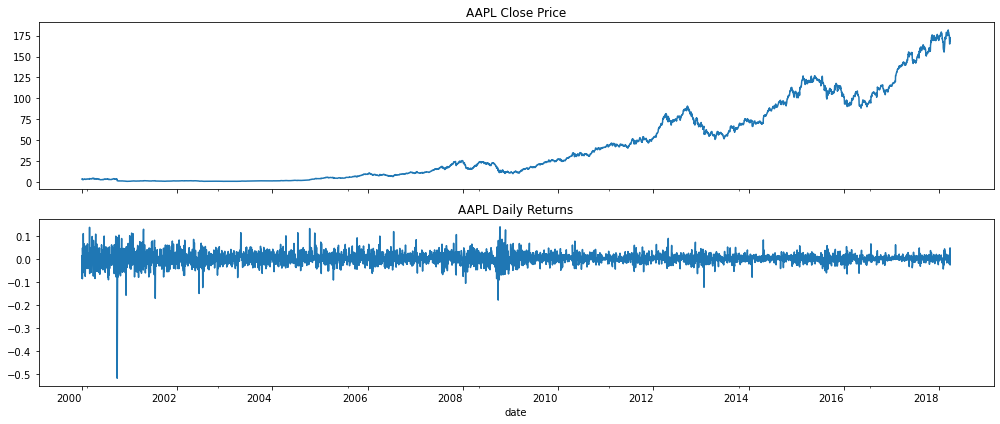

In [38]:
fig, axes = plt.subplots(nrows=2, figsize=(14, 6), sharex=True)
s = df.loc[symbol, 'close']
s.plot(rot=0, ax=axes[0], title=f'{symbol} Close Price')
s.pct_change().plot(rot=0, ax=axes[1], title=f'{symbol} Daily Returns')
#axes[1].set_xlabel('')
#sns.despine()
fig.tight_layout()

## Store in HDF5 format

In [39]:
df.to_hdf('stock_prices.h5', key='df', mode='w')